## Task _ 6.4: Supervised Machine Learning: Regression

Part 1. Importing and data checking. 

Part 2. Statistical and Visual EDA. 

Part 3. Updating hypothesizes. 

Part 4. Building four supervised regression models.

Part 5. Concussion and restating the hypothesis. 

### Part 1
#### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print("All libraries are ok")

All libraries are ok


In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Getting the file #setting the path to get the file

file = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A6_Healthcare_Access_US/1_sourceing_open_data/US project/Data/Output/final_dataset_v3.csv'

# reading the file
df = pd.read_csv(file)

# checing the file 

df.head(5)

,FIPS,State,County,air_pollution__air_pollution_2020,air_pollution__air_pollution_2021,air_pollution__air_pollution_2022,air_pollution__air_pollution_2023,air_pollution__air_pollution_2024,air_pollution__air_pollution_mean,children_lunch__children_lunch_2020,...,fmr_0_2022,fmr_1_2022,fmr_2_2022,fmr_3_2022,fmr_4_2022,fmr_0_2024,fmr_1_2024,fmr_2_2024,fmr_3_2024,fmr_4_2024
0,1001,AL,Autauga County,11.7,10.4,9.5,10.0,10.0,10.32,0.434087,...,643.0,764.0,914.0,1156.0,1494.0,836.0,913.0,1092.0,1383.0,1753.0
1,1003,AL,Baldwin County,10.3,7.2,7.2,7.6,7.6,7.98,0.484866,...,772.0,777.0,1017.0,1348.0,1715.0,1051.0,1056.0,1362.0,1670.0,2114.0
2,1005,AL,Barbour County,11.5,9.4,9.0,9.4,9.4,9.74,0.632923,...,532.0,536.0,705.0,871.0,980.0,652.0,656.0,857.0,1089.0,1141.0
3,1007,AL,Bibb County,11.2,10.0,9.4,9.8,9.8,10.04,0.615621,...,765.0,820.0,943.0,1220.0,1316.0,983.0,1109.0,1245.0,1570.0,1752.0
4,1009,AL,Blount County,11.7,10.6,9.4,9.6,9.6,10.18,0.529063,...,765.0,820.0,943.0,1220.0,1316.0,983.0,1109.0,1245.0,1570.0,1752.0


In [6]:
# Checing files for duplicates

if df.duplicated().sum() == 0:
    print("No duplicated rows.")
else:
    print(f"Found {df.duplicated().sum()} duplicated rows.")

# and missted values

if df.isnull().sum().sum()==0:
    print("No missed value.")
else:
    print(f"Found {df.isnull().sum().sum()} missed values. Investigate futher.")

No duplicated rows.
No missed value.


### Part 2
#### Exploring the relationship visually 
In the previous task (6.2), we examined individual correlations among 13 variables:
Uninsured, PC Physicians, Mental Health, Dentists, Flu Vaccination, Mammography (Healthcare Access),
Median Income, Child Poverty, Unemployment, Income Inequality, Diversity Index (Socioeconomic & Demographic),
Exercise Access, Food Insecurity (Infrastructure & Access).

While the exploratory data analysis (EDA) revealed a strong link between child poverty and food insecurity, variables such as diversity index, income inequality, and median income showed weak correlations with individual direct healthcare access indicators (e.g., uninsured rate and physician availability). This might suggest that effective predictive modeling will require more targeted or domain-specific variables beyond broad socioeconomic descriptors.

Therefore, we are taking a second attempt to explore the relationship visually by creating a unified measure of healthcare access. To construct this measure, five indicators—PC Physicians, Mental Health Providers, Dentists, Flu Vaccination, and Mammography Screening—were standardized using z-score transformation. This method, which adjusts each variable to have a mean of zero and a standard deviation of one, was chosen to ensure comparability across variables with differing units and value ranges. Bringing all values onto the same scale eliminated scale bias and allowed each indicator to contribute fairly to the overall score. 

In [8]:
healthcare_columns = [
    # 🏥 Healthcare Access & Resources
    "primary_care_physicians__primary_care_physicians_mean",
    "mental_health_providers_raw_val__mental_health_providers_mean",
    "dentists_raw_value__dentists_mean",
    "flu_vaccinations_raw_value__flu_vaccinations_mean",
    "mammography_screening__mammography_screening_mean"]

# Standardize healthcare-related variables using z-score transformation
# Z-score formula: z = (x - mean) / standard deviation
# This rescales each variable to have a mean of 0 and a standard deviation of 1,
# ensuring comparability across different units (e.g., per capita counts vs. percentages)

from scipy.stats import zscore

# Apply z-score standardization to each column
df_scaled_healthcare = df[healthcare_columns].apply(zscore)

# (Optional) Rename columns to indicate they are standardized
df_scaled_healthcare.columns = [col + " (z-score)" for col in df_scaled_healthcare.columns]

In [9]:
df_scaled_healthcare.columns

Index(['primary_care_physicians__primary_care_physicians_mean (z-score)',
       'mental_health_providers_raw_val__mental_health_providers_mean (z-score)',
       'dentists_raw_value__dentists_mean (z-score)',
       'flu_vaccinations_raw_value__flu_vaccinations_mean (z-score)',
       'mammography_screening__mammography_screening_mean (z-score)'],
      dtype='object')

In [10]:
df_scaled_healthcare.head()

,primary_care_physicians__primary_care_physicians_mean (z-score),mental_health_providers_raw_val__mental_health_providers_mean (z-score),dentists_raw_value__dentists_mean (z-score),flu_vaccinations_raw_value__flu_vaccinations_mean (z-score),mammography_screening__mammography_screening_mean (z-score)
0,-0.260675,-0.758746,-0.449566,-0.163984,-0.044007
1,0.399974,-0.394501,0.040740,0.259577,0.300145
2,-0.560401,-0.826705,-0.381040,-0.506867,0.432511
3,0.112758,-0.754053,-0.703236,-0.789242,-0.652892
4,-0.940223,-0.826305,-0.889743,-0.305171,-0.705839


In [11]:
# Define policy-aligned weights for each z-scored healthcare indicator
# Values chosen based on public health emphasis (e.g., WHO, CDC, AHRQ priorities)

weights = {
    "primary_care_physicians__primary_care_physicians_mean (z-score)": 0.30,   # Core access point in all health systems
    "mental_health_providers_raw_val__mental_health_providers_mean (z-score)": 0.25,  # Underserved and critical post-pandemic
    "dentists_raw_value__dentists_mean (z-score)": 0.20,  # Preventive care with medium priority
    "flu_vaccinations_raw_value__flu_vaccinations_mean (z-score)": 0.15,  # Population-level disease prevention
    "mammography_screening__mammography_screening_mean (z-score)": 0.10  # Targeted screening (age and gender-specific)
}

# Apply the weights to each standardized column
df_weighted_healthcare = df_scaled_healthcare.copy()
for col in df_weighted_healthcare.columns:
    df_weighted_healthcare[col] = df_weighted_healthcare[col] * weights[col]

# Calculate the final composite score (weighted average of z-scores)
df["Healthcare Access (Weighted Z-score Composite)"] = df_weighted_healthcare.sum(axis=1)


In [12]:
df["Healthcare Access (Weighted Z-score Composite)"].head() # checking a new column in the original dataset 

0   -0.386801
1    0.098466
2   -0.483784
3   -0.479009
4   -0.782951
Name: Healthcare Access (Weighted Z-score Composite), dtype: float64

# Choosing independent variables 


Selected for Inclusion:

#### Median Income
It represents overall regional wealth and is often inversely related to health disparities.
#### Diversity Index
Captures racial and ethnic heterogeneity; included to explore social or structural variation in healthcare access.
#### Exercise Access
Although categorized as an infrastructure variable, it may serve as a proxy for health-promoting environments and community-level wellness resources.
#### Uninsured
While typically treated as a healthcare outcome, it is cautiously included here as a potential predictor of broader systemic access issues. Interpretation should be done with care to avoid circular reasoning.


### To Be Monitored for Multicollinearity (VIF Test):

#### Child Poverty
Strongly correlated with food insecurity; represents economic deprivation and is a critical predictor of healthcare inequity.
#### Unemployment
Signals broader economic hardship, which may impact both affordability and utilization of healthcare services.
#### Income Inequality
Reflects systemic disparities in wealth distribution; may overlap conceptually or statistically with income and poverty measures.

In [14]:
from sklearn.preprocessing import StandardScaler

# Step 1: Define selected columns
selected_columns = [
    "Healthcare Access (Weighted Z-score Composite)",
    "uninsured_raw_value__uninsured_mean",
    "median_income__median_income_mean",
    "children_poverty__children_poverty_mean",
    "unemployment__unemployment_mean",
    "income_inequality__income_inequality_mean",
    "Diversity Index",
    "exercise_access__exercise_access_mean",
    "food_insecurity__food_insecurity_mean"
]

# Step 2: Create sub-dataset and rename
df_healthcare_predictors = df[selected_columns].rename(columns={
    "Healthcare Access (Weighted Z-score Composite)": "Healthcare Access Score",
    "uninsured_raw_value__uninsured_mean": "Uninsured",
    "median_income__median_income_mean": "Median Income",
    "children_poverty__children_poverty_mean": "Child Poverty",
    "unemployment__unemployment_mean": "Unemployment",
    "income_inequality__income_inequality_mean": "Income Inequality",
    "Diversity Index": "Diversity Index",
    "exercise_access__exercise_access_mean": "Exercise Access",
    "food_insecurity__food_insecurity_mean": "Food Insecurity"
})

# Step 3: Scale only independent variables (exclude dependent)
independent_cols = [
    "Uninsured", "Median Income", "Child Poverty", "Unemployment",
    "Income Inequality", "Diversity Index", "Exercise Access", "Food Insecurity"
]

scaler = StandardScaler()
df_healthcare_predictors[independent_cols] = scaler.fit_transform(df_healthcare_predictors[independent_cols])

# Step 4: Reset index
df_healthcare_predictors.reset_index(drop=True, inplace=True)

# Step 5: Preview
df_healthcare_predictors.head()


,Healthcare Access Score,Uninsured,Median Income,Child Poverty,Unemployment,Income Inequality,Diversity Index,Exercise Access,Food Insecurity
0,-0.386801,-0.378439,0.455766,-0.418107,-0.890182,0.624420,0.546090,0.072869,0.494877
1,0.098466,-0.040112,0.513337,-0.649846,-0.768405,-0.172531,-0.079622,0.434043,-0.075667
2,-0.483784,0.295069,-1.351245,2.316899,0.346270,1.586004,1.467577,-0.337621,2.150572
3,-0.479009,-0.083266,-0.552886,0.745417,-0.455489,0.781882,0.411258,-1.801875,0.757774
4,-0.782951,0.375413,-0.167377,-0.212921,-1.080221,0.118465,-0.685086,-1.505271,0.159263


In [15]:
# check for mixed-type data 
has_mixed_type = False

for column in df_healthcare_predictors.columns.tolist():
    weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
    if len(df_healthcare_predictors[weird])>0:
        print(f"Mixed-type found in column: {column}")
        has_mixed_type = True
if not has_mixed_type:
        print("No mixed-type columns found!")

No mixed-type columns found!


/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_22733/2094435173.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_22733/2094435173.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_22733/2094435173.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_22733/2094435173.py:5: FutureWarning: DataFrame.apply

In [16]:
# Creating a colored correlation matrix heatmap 
# to explore relationships between numeric variables.

# first exploring coorealtion

df_healthcare_predictors.corr().round(3)


,Healthcare Access Score,Uninsured,Median Income,Child Poverty,Unemployment,Income Inequality,Diversity Index,Exercise Access,Food Insecurity
Healthcare Access Score,1.000,-0.385,0.419,-0.373,-0.073,-0.018,0.095,0.553,-0.312
Uninsured,-0.385,1.000,-0.343,0.407,0.002,0.177,0.393,-0.261,0.408
Median Income,0.419,-0.343,1.000,-0.807,-0.302,-0.429,0.055,0.461,-0.731
Child Poverty,-0.373,0.407,-0.807,1.000,0.488,0.624,0.275,-0.379,0.850
Unemployment,-0.073,0.002,-0.302,0.488,1.000,0.371,0.220,0.013,0.551
Income Inequality,-0.018,0.177,-0.429,0.624,0.371,1.000,0.326,-0.119,0.599
Diversity Index,0.095,0.393,0.055,0.275,0.220,0.326,1.000,0.176,0.223
Exercise Access,0.553,-0.261,0.461,-0.379,0.013,-0.119,0.176,1.000,-0.305
Food Insecurity,-0.312,0.408,-0.731,0.850,0.551,0.599,0.223,-0.305,1.000


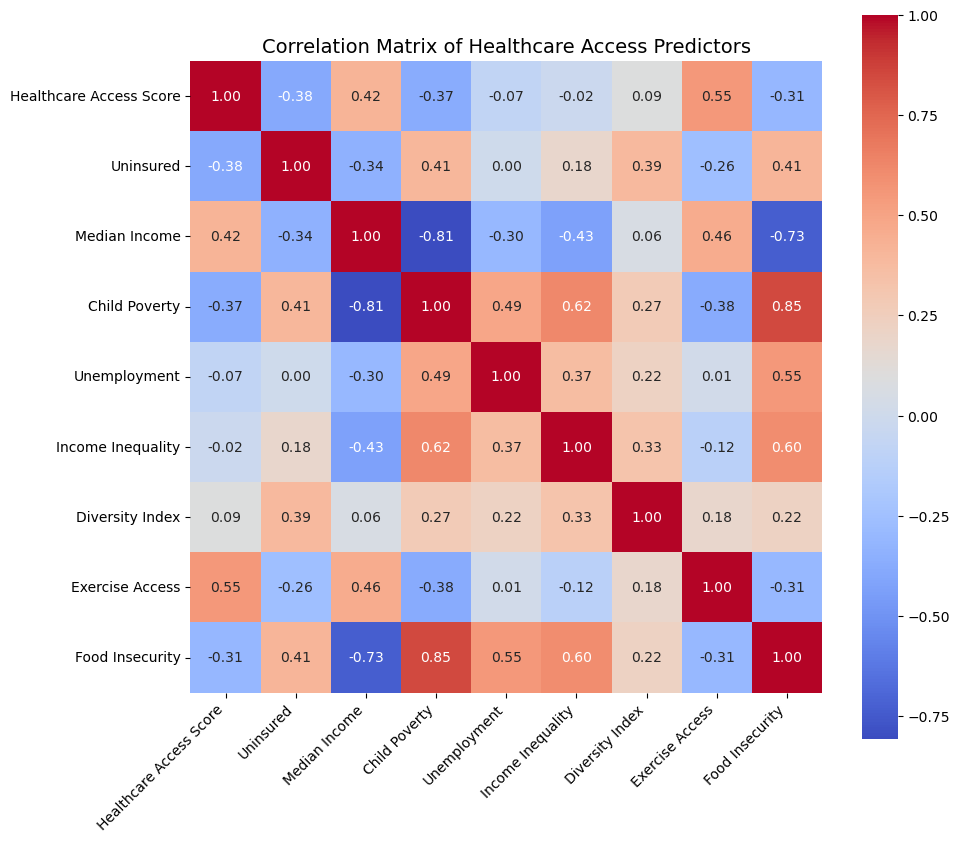

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df_healthcare_predictors.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",                 # Format annotations to 2 decimal places
    cmap="coolwarm",
    square=True,               # Square cells for a clean layout
    cbar_kws={"shrink": 0.8}   # Optional: shrink colorbar
)

plt.title("Correlation Matrix of Healthcare Access Predictors", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()             # Avoid label cutoff
plt.show()


In [18]:
import numpy as np

# Get upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten and drop NaNs to get valid correlation pairs only
valid_corrs = upper_triangle.stack()

# Get median of all valid correlations
median_corr = valid_corrs.median()
print("Median correlation (excluding self-correlations):", median_corr)


Median correlation (excluding self-correlations): 0.13527605892941758


In [19]:
# Step X: Check for multicollinearity using Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric columns (predictors)
X = df_healthcare_predictors.select_dtypes(include='number')

# Add a constant (intercept) to the model — required for VIF calculation
X = add_constant(X)

# Create a DataFrame to store VIF values
vif = pd.DataFrame()
vif["Feature"] = X.columns  # Feature names
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # VIF scores

# Print VIF results
print(vif)


                   Feature       VIF
0                    const  1.000000
1  Healthcare Access Score  1.756507
2                Uninsured  1.865734
3            Median Income  4.154654
4            Child Poverty  6.812815
5             Unemployment  1.758605
6        Income Inequality  1.944009
7          Diversity Index  1.928184
8          Exercise Access  1.695102
9          Food Insecurity  4.601243


Child Poverty exhibits the highest VIF (6.81), suggesting potential multicollinearity—likely with Food Insecurity and Median Income. To reduce redundancy and improve model stability, we may consider dropping Child Poverty or testing models with and without it for comparison.

In [21]:
df_healthcare_predictors = df_healthcare_predictors.drop(columns=["Child Poverty"]) # dropping column

In [22]:
# Select only numeric columns (predictors)
X = df_healthcare_predictors.select_dtypes(include='number')

# Add a constant (intercept) to the model — required for VIF calculation
X = add_constant(X)

# Create a DataFrame to store VIF values
vif = pd.DataFrame()
vif["Feature"] = X.columns  # Feature names
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # VIF scores

# Print VIF results
print(vif)

                   Feature       VIF
0                    const  1.000000
1  Healthcare Access Score  1.722127
2                Uninsured  1.863410
3            Median Income  2.779435
4             Unemployment  1.718381
5        Income Inequality  1.798054
6          Diversity Index  1.687165
7          Exercise Access  1.673191
8          Food Insecurity  3.913698


Removing Child Poverty successfully reduced multicollinearity without sacrificing key variable diversity.

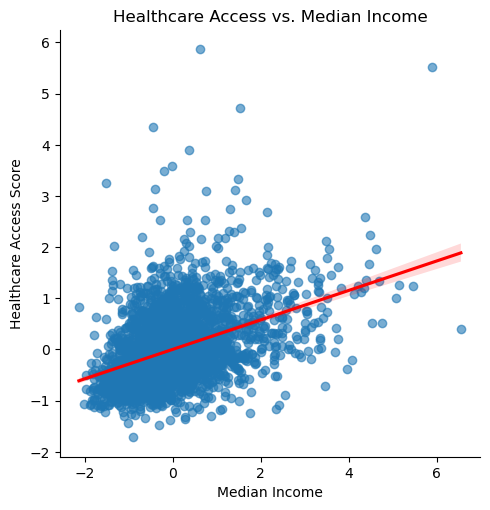

In [24]:

sns.lmplot(
   x="Median Income",
    y="Healthcare Access Score",
    data=df_healthcare_predictors,
    line_kws={'color': 'red'},   # Line color
    scatter_kws={'alpha': 0.6}   # Optional: make points slightly transparent
)

plt.title("Healthcare Access vs. Median Income")
plt.show()


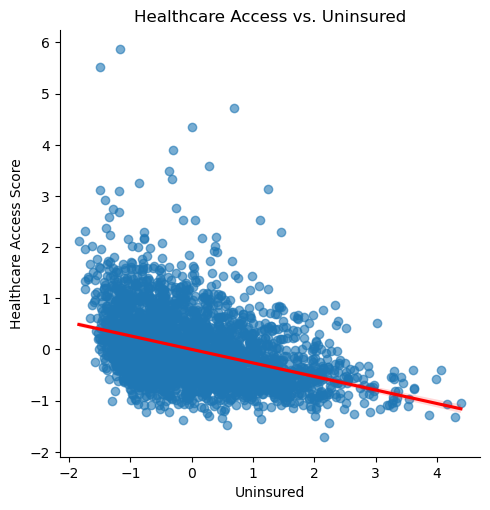

In [25]:

sns.lmplot(
    x="Uninsured",
    y="Healthcare Access Score",
    data=df_healthcare_predictors,
    line_kws={'color': 'red'},   # Line color
    scatter_kws={'alpha': 0.6}   # Optional: make points slightly transparent
)

plt.title("Healthcare Access vs. Uninsured")
plt.show()


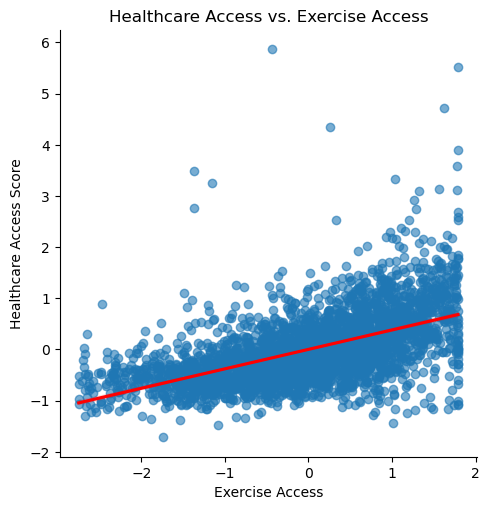

In [26]:

sns.lmplot(
    x="Exercise Access",
    y="Healthcare Access Score",
    data=df_healthcare_predictors,
    line_kws={'color': 'red'},   # Line color
    scatter_kws={'alpha': 0.6}   # Optional: make points slightly transparent
)

plt.title("Healthcare Access vs. Exercise Access")
plt.show()


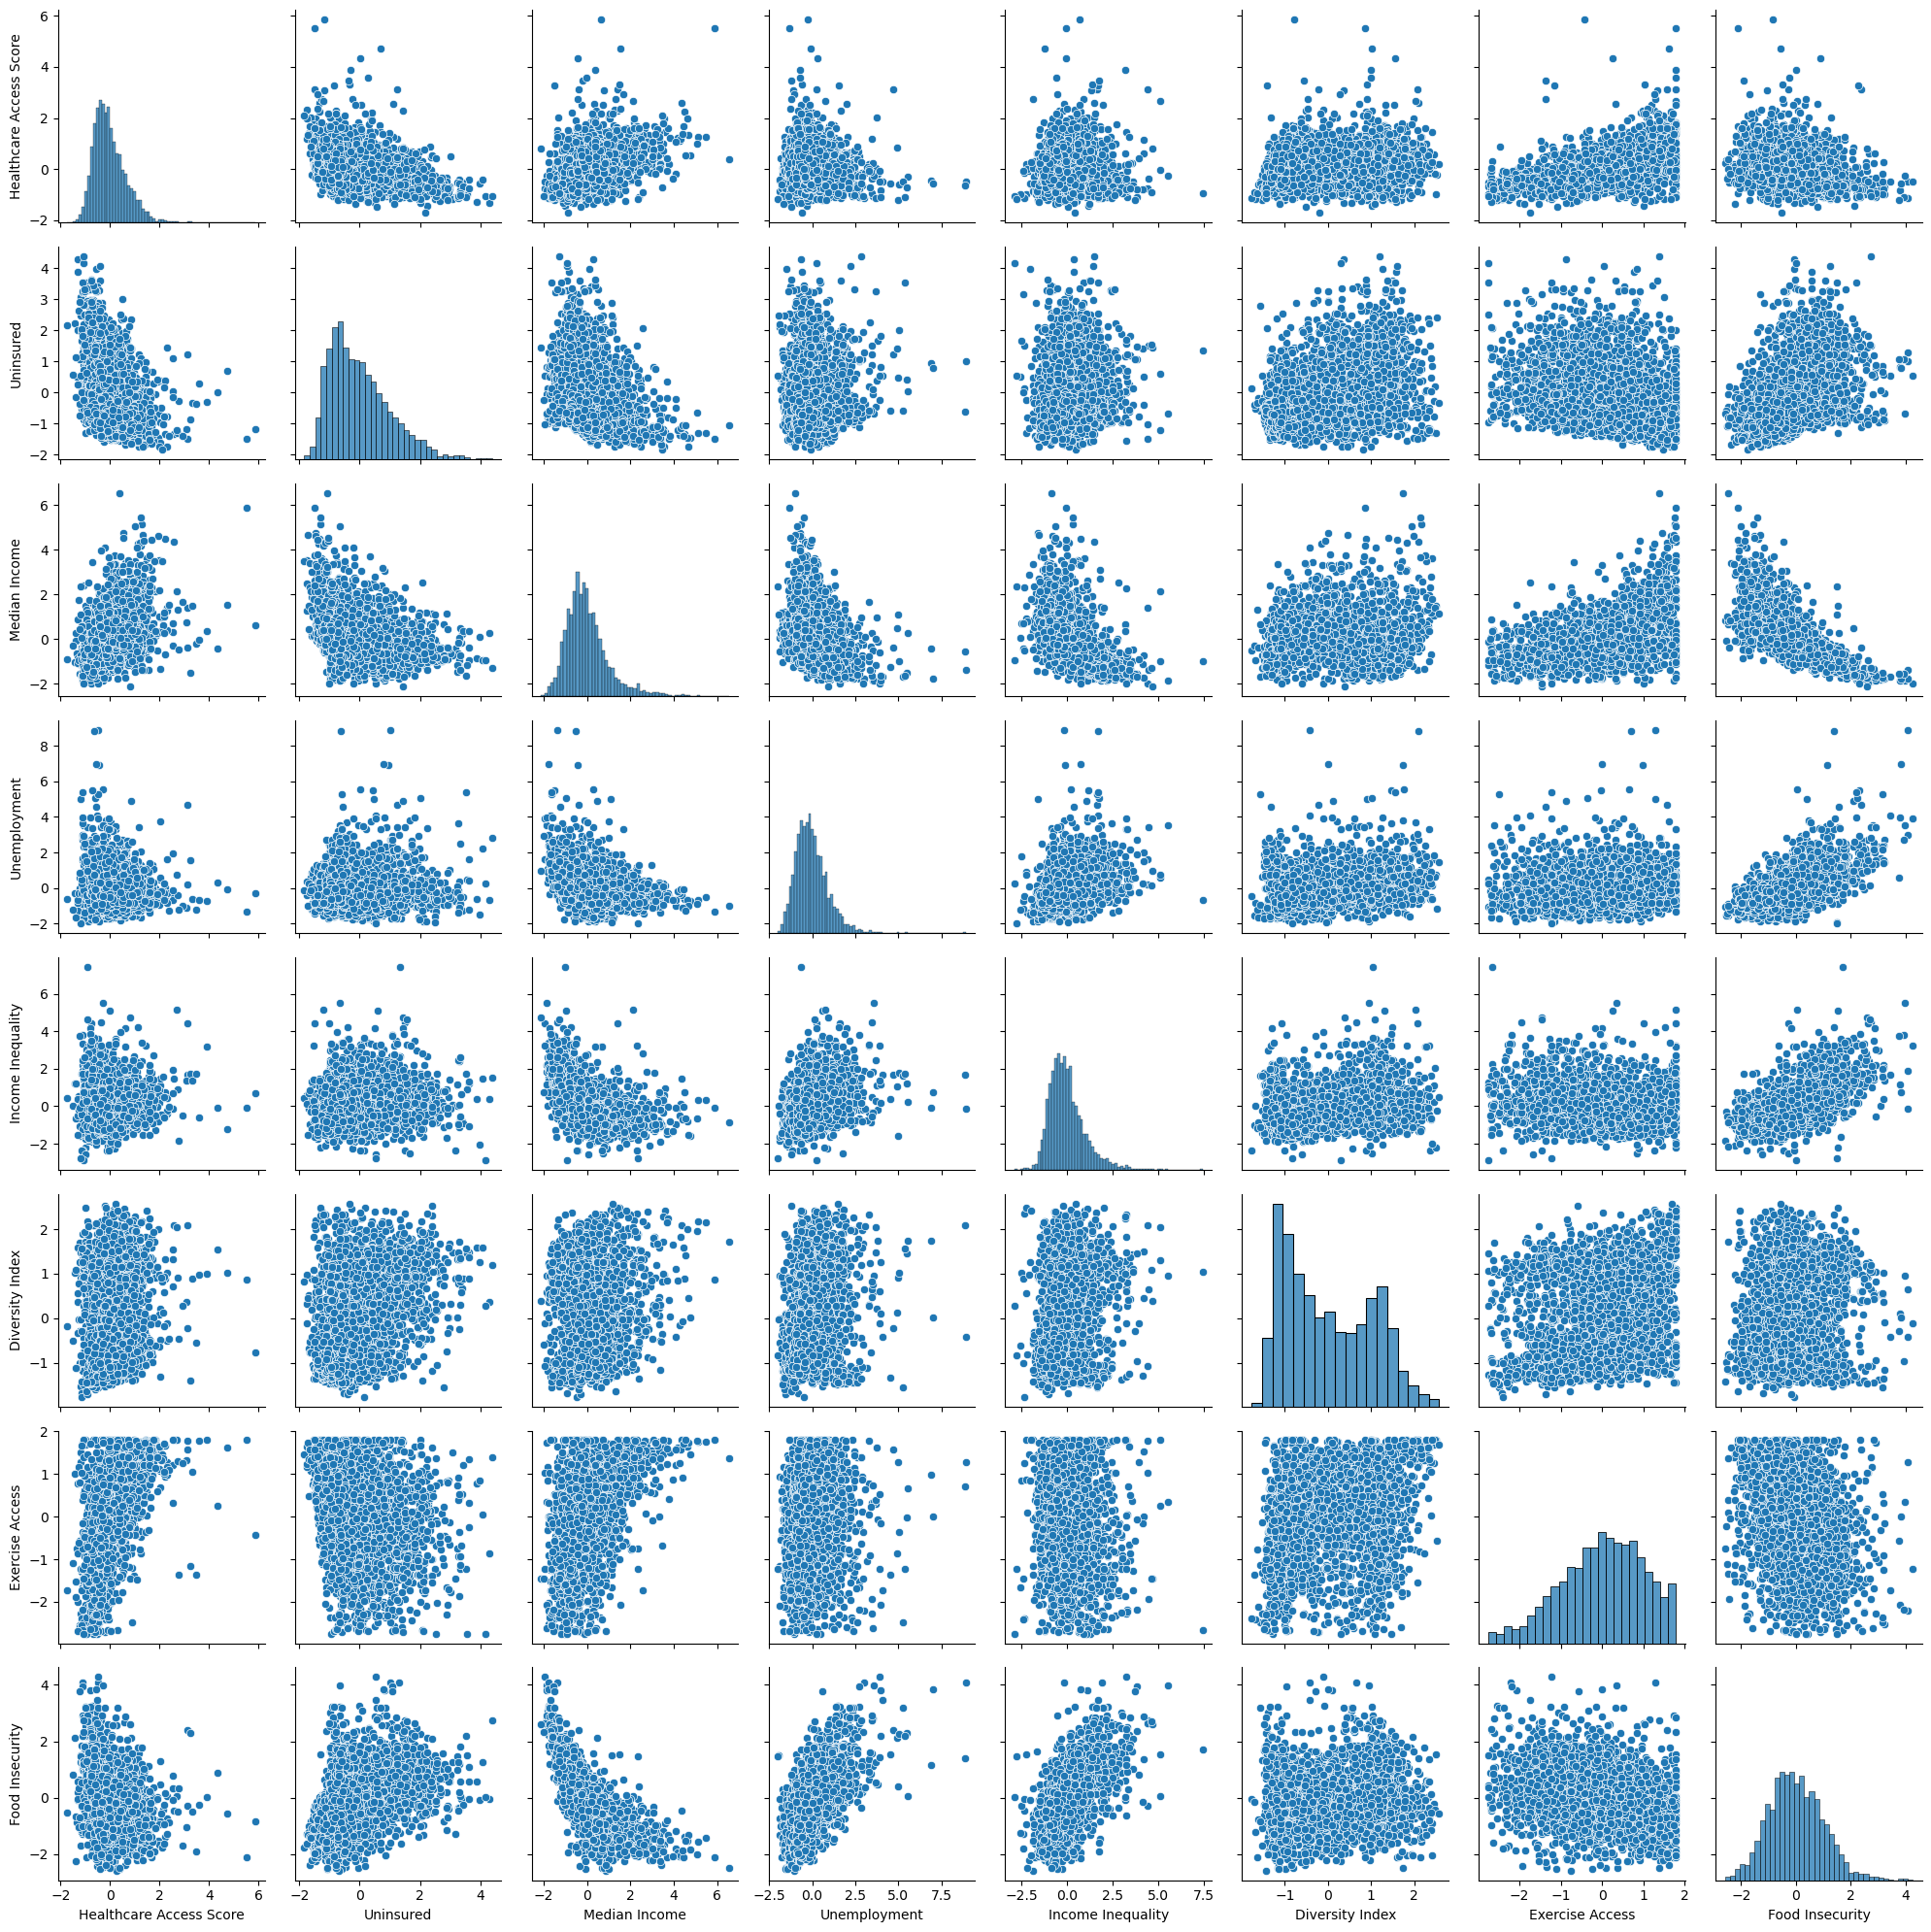

In [27]:
# Creating a pair plot of the entire dataset 
# to inspect distributions and relationships.

g = sns.pairplot(df_healthcare_predictors)
plt.tight_layout()  
plt.show()

/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_22733/3456755390.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


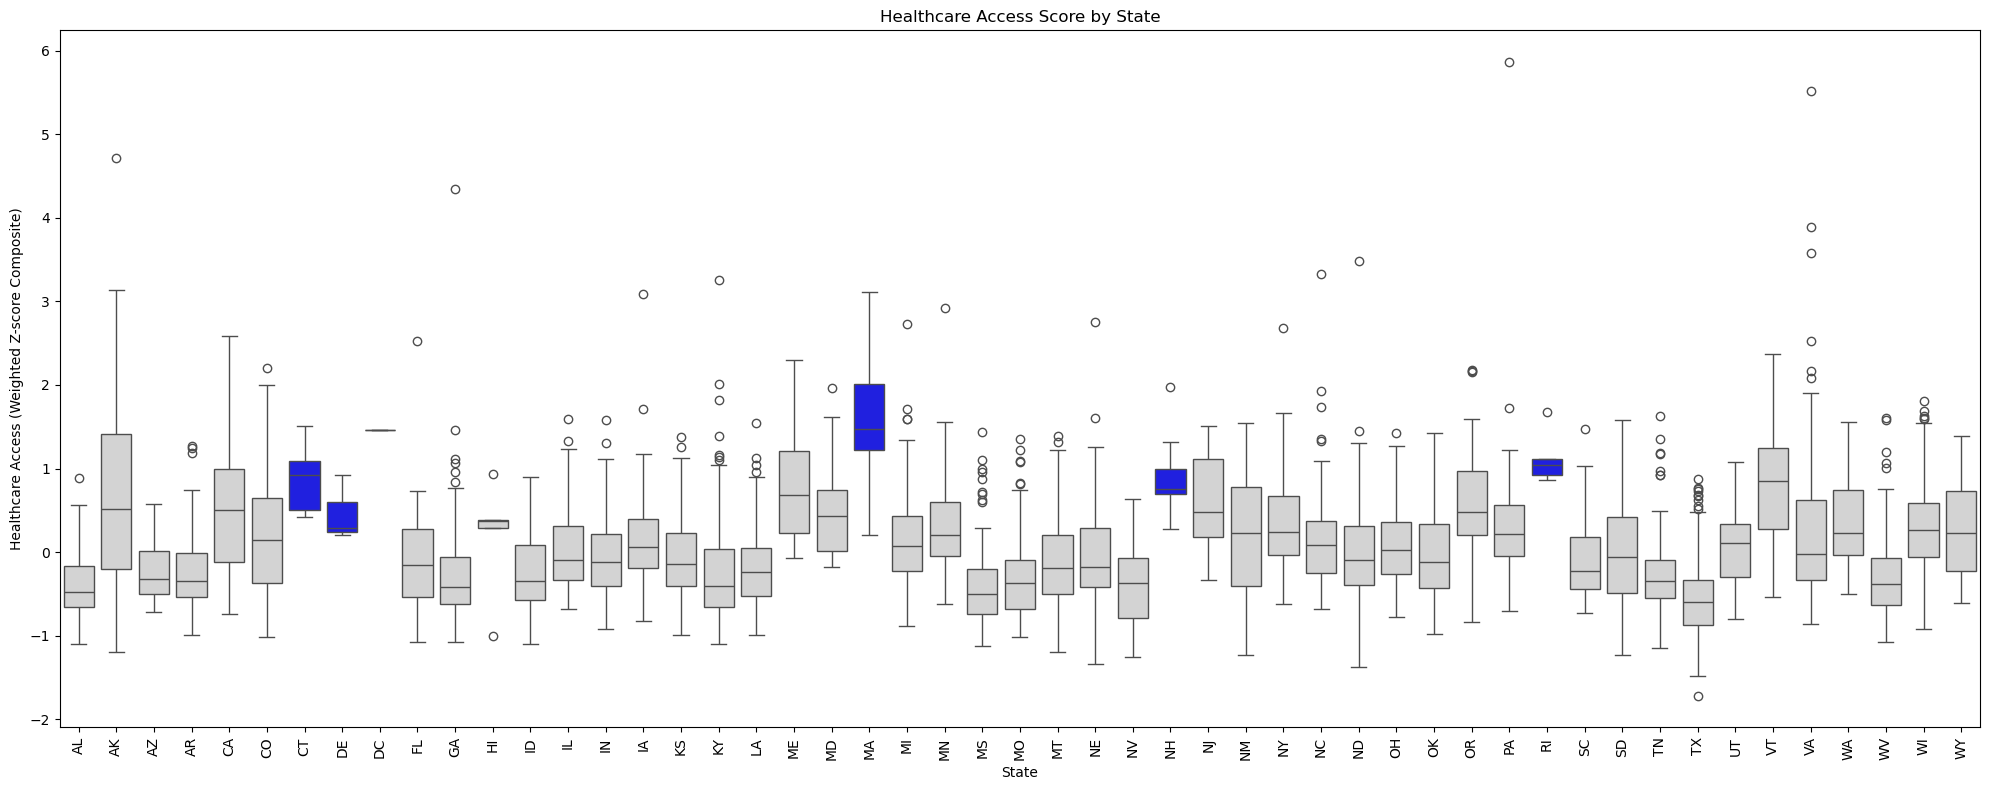

In [28]:

# Step 1: Get per-state min and max for the composite score
grouped = df.groupby("State")["Healthcare Access (Weighted Z-score Composite)"]
state_min = grouped.min()
state_max = grouped.max()

# Step 2: Define custom color palette
palette = {}
for state in df["State"].unique():
    if state_min[state] > 0:
        palette[state] = "blue"  # Entire box above 0
    elif state_max[state] < 0:
        palette[state] = "red"   # Entire box below 0
    else:
        palette[state] = "lightgray"  # Mixed

# Step 3: Plot boxplot with custom colors
plt.figure(figsize=(20, 8))
sns.boxplot(
    x="State",
    y="Healthcare Access (Weighted Z-score Composite)",
    data=df,
    palette=palette
)

plt.xticks(rotation=90)
plt.title("Healthcare Access Score by State")
plt.xlabel("State")
plt.ylabel("Healthcare Access (Weighted Z-score Composite)")
plt.tight_layout()
plt.show()


In [29]:
df["Healthcare Access (Weighted Z-score Composite)"].describe()

count    3.143000e+03
mean     7.573395e-17
std      6.876503e-01
min     -1.718967e+00
25%     -4.822910e-01
50%     -1.175032e-01
75%      3.670669e-01
max      5.863994e+00
Name: Healthcare Access (Weighted Z-score Composite), dtype: float64

### EDA Insights 
The heatmap confirms that it was a sound decision to combine health-related indicators into a unified Healthcare Access Score for analysis. The correlation matrix reveals a moderate positive relationship between healthcare access and Median Income (r = 0.42) and Exercise Access (r = 0.55), indicating that regions with greater wealth and healthier infrastructure tend to have better access to care. A moderate negative correlation exists between the Uninsured Rate (r = –0.38) and Food Insecurity, suggesting that higher access is associated with more coverage and better food environments.
Surprisingly, the matrix did not reveal strong or meaningful correlations with variables like Unemployment, Income Inequality, or the Diversity Index, implying that these structural or demographic factors may not directly explain variations in healthcare access in this dataset.

In addition, states such as Connecticut (CT), Delaware (DE), Washington D.C. (DC), Massachusetts (MA), New Hampshire (NH), and Rhode Island (RI) demonstrate the highest levels of healthcare access overall. Massachusetts (MA) stands out as the top performer, followed closely by the others. These states have composite scores consistently above zero, reflecting above-average access to healthcare services across their regions.

### 

### Part 3
### Preliminary hypothesis

#### H₀ (Null Hypothesis):
Median income, child poverty rates, and population characteristics (e.g., diversity index) have no statistically significant relationship with healthcare access.
#### H₁ (Alternative Hypothesis):
Median income, child poverty rates, and population characteristics (e.g., diversity index) are statistically significant predictors of healthcare access.

### Updated hypothesis
#### H₀ (Null Hypothesis):
There is no statistically significant relationship between Median Income, Exercise Access, or Food Insecurity and overall Healthcare Access.
#### H₁ (Alternative Hypothesis):
Median Income and Exercise Access are positively associated with Healthcare Access, while Food Insecurity shows a moderate negative relationship.

#### Note for the future regression

The Uninsured Rate was not included as a predictor in the regression model, as it is conceptually an outcome of healthcare access. However, its moderate negative correlation (r = –0.38) with the composite Healthcare Access Score supports the validity of the unified metric.

### Part 4

Reshaping the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [35]:
#reshaping values to 2D array
X = df_healthcare_predictors["Median Income"].values.reshape(-1,1)
y = df_healthcare_predictors["Healthcare Access Score"].values.reshape(-1, 1)

In [36]:
# Split the dataset into training and testing sets (70% train, 30% test)
# X = feature(s), y = target
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
# Initialize the linear regression model
regression = LinearRegression()

In [38]:
regression.fit(X_train, y_train) # placing regression object onto training sets

LinearRegression()

In [39]:
print("Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Slope: [[0.28713247]]
Intercept: [-0.00638106]


Interpretation of Linear Regression Model
Slope (b₁) = 0.0000195 (≈ 1.95e-05)
→ For every $1 increase in Median Income, the Healthcare Access Score increases by approximately 0.0000195

→ So for a $10,000 increase, the score rises by around 0.195

Intercept (b₀) = –1.13
→ When Median Income is $0 (hypothetically), the predicted Healthcare Access Score is –1.13, indicating low access — which makes sense for an extremely low-income region.

In [41]:
y_predicted = regression.predict(X_test) 
#The model has been trained on 70% of the data, and it is now making predictions on the unseen 30% using 
#the corresponding X_test values. These predictions estimate the target variable (y) for new, previously unobserved data.

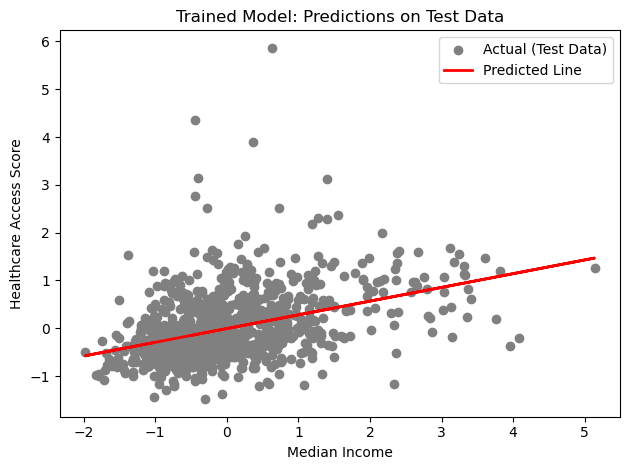

In [42]:
# Plot actual test data points
plt.scatter(X_test, y_test, color='gray', label='Actual (Test Data)')

# Plot predicted regression line (on test data)
plt.plot(X_test, y_predicted, color='red', linewidth=2, label='Predicted Line')

# Labels and title
plt.title('Trained Model: Predictions on Test Data')
plt.xlabel("Median Income")
plt.ylabel("Healthcare Access Score")
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Mean squared error:  0.4244331084425623
R2 score:  0.16237119954782842


The model trained using Median Income as the sole predictor returned a Mean Squared Error of 0.42 and an R² score of 0.16. This means the predictions were moderately off on average, and only 16% of the variation in Healthcare Access Score was explained by income alone. These results suggest that while income contributes to access, it is not sufficient by itself to model the outcome accurately. Adding more predictors could improve performance.

In [46]:
# Working on possible outliers

Q1 = df_healthcare_predictors["Healthcare Access Score"].quantile(0.25)
Q3 = df_healthcare_predictors["Healthcare Access Score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5 * IQR 
upper_bound = Q3+1.5 * IQR 

outliers = df_healthcare_predictors[df_healthcare_predictors["Healthcare Access Score"] > upper_bound]
outliers.shape


(58, 8)

While we identified 58 statistical outliers in the dataset—values that exceed the upper bound based on the interquartile range—we acknowledge that these points may influence our mean squared error and R² score. However, since the data comes from reliable federal sources, we will not remove these statistical outliers. Instead, we will continue our analysis by enhancing the model with additional predictor variables.

We use values to convert the selected predictors into a NumPy array to add new independent variables to the model. Scikit-learn’s regression model requires this format and allows us to combine multiple independent variables—such as Median Income, Exercise Access, and Food Insecurity—into a single X matrix suitable for training.

In [49]:
# Goal: Check for multicollinearity among independent variables (X) 
# by calculating the Variance Inflation Factor (VIF) for each feature.
# A high VIF (typically > 5 or 10) indicates that a variable is strongly correlated with others in the model,
# which may distort regression estimates and reduce model reliability.

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Step 1: Create a new DataFrame with selected X variables
X_vars = df_healthcare_predictors[["Median Income", "Exercise Access", "Food Insecurity"]]

# Step 2: Add constant (intercept term)
X_vars = sm.add_constant(X_vars)

# Step 3: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vars.columns
vif_data["VIF"] = [variance_inflation_factor(X_vars.values, i) for i in range(X_vars.shape[1])]

vif_data

,Feature,VIF
0,const,1.000000
1,Median Income,2.477925
2,Exercise Access,1.273611
3,Food Insecurity,2.151615


Low multicollinearity (VIF < 5) is ideal. Even if we were to eliminate the "Food Insecurity" variable, the multicollinearity coefficient for "Median Income" would likely decrease further, indicating less shared variance with other predictors.

In [51]:
# To maintain a clear progression in model building, we define independent variables in stages:
# X_1 includes only "Median Income" (already tested),
# X_2 adds "Exercise Access" to observe the effect of an additional predictor,
# X_3 includes "Food Insecurity" to test a full three-variable model.

# including reshaping them

X_2 = df_healthcare_predictors[["Median Income", "Exercise Access"]].values
X_3 = df_healthcare_predictors[["Median Income", "Exercise Access", "Food Insecurity"]].values

In [52]:
# Split dataset using X_2 (Median Income + Exercise Access)
y = df_healthcare_predictors["Healthcare Access Score"].values.reshape(-1, 1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.3, random_state=0)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.3, random_state=0)

In [53]:
# For X_2 model (Median Income + Exercise Access)
regression_2 = LinearRegression()
regression_2.fit(X_train_2, y_train_2)

LinearRegression()

In [54]:
regression_3 = LinearRegression() # For X_2 model (Median Income + Exercise Access + Food insecurity)
regression_3.fit(X_train_3, y_train_3)

LinearRegression()

In [55]:
y_predicted_2 = regression_2.predict(X_test_2) 

In [56]:
y_predicted_3 = regression_3.predict(X_test_3)

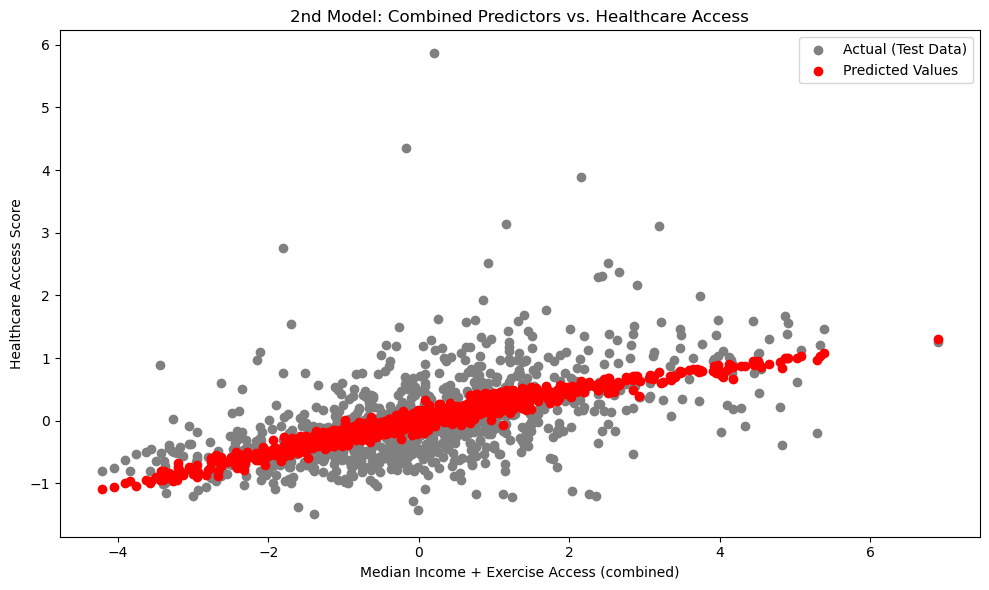

In [57]:
# Combine the two predictors to use as a single x-axis input
combined_input = X_test_2[:, 0] + X_test_2[:, 1]

plt.figure(figsize=(10, 6))

plt.scatter(combined_input, y_test_2, color='gray', label='Actual (Test Data)')
plt.scatter(combined_input, y_predicted_2, color='red', label='Predicted Values')  # use scatter instead of line

plt.title('2nd Model: Combined Predictors vs. Healthcare Access')
plt.xlabel("Median Income + Exercise Access (combined)")
plt.ylabel("Healthcare Access Score")
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

print("2nd Model Coefficients (X₂):", regression_2.coef_)
print("2nd Model Intercept:", regression_2.intercept_)

# Model evaluation metrics
rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

print("2nd Model - Mean Squared Error:", rmse_2)
print("2nd Model - R2 Score:", r2_2)


2nd Model Coefficients (X₂): [[0.14245491 0.32379142]]
2nd Model Intercept: [-0.0032473]
2nd Model - Mean Squared Error: 0.35831620205550624
2nd Model - R2 Score: 0.292854481565619


In [59]:
print("3rd Model Coefficients (X₃):", regression_3.coef_)
print("3rd Model Intercept:", regression_3.intercept_)

# Model evaluation metrics
rmse_3 = mean_squared_error(y_test_3, y_predicted_3)
r2_3 = r2_score(y_test_3, y_predicted_3)

print("3rd Model - Mean Squared Error:", rmse_3)
print("3rd Model - R2 Score:", r2_3)


3rd Model Coefficients (X₃): [[ 0.11683399  0.3250465  -0.034243  ]]
3rd Model Intercept: [-0.00305757]
3rd Model - Mean Squared Error: 0.35833304612088923
3rd Model - R2 Score: 0.29282123940330684


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define the independent variable set X₄
X_4 = df_healthcare_predictors[["Median Income", "Food Insecurity"]].values

# Step 2: Define the dependent variable (Healthcare Access Score)
y = df_healthcare_predictors["Healthcare Access Score"].values.reshape(-1, 1)

# Step 3: Split into training and test sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, test_size=0.3, random_state=0)

# Step 4: Create and train the regression model
regression_4 = LinearRegression()
regression_4.fit(X_train_4, y_train_4)

# Step 5: Make predictions
y_predicted_4 = regression_4.predict(X_test_4)

# Step 6: Print model summary
print("4th Model Coefficients (X₄):", regression_4.coef_)
print("4th Model Intercept:", regression_4.intercept_)

# Step 7: Evaluate performance
rmse_4 = mean_squared_error(y_test_4, y_predicted_4)
r2_4 = r2_score(y_test_4, y_predicted_4)

print("4th Model - Mean Squared Error:", rmse_4)
print("4th Model - R2 Score:", r2_4)

4th Model Coefficients (X₄): [[ 0.2762534  -0.01486553]]
4th Model Intercept: [-0.00630397]
4th Model - Mean Squared Error: 0.4246549867455634
4th Model - R2 Score: 0.16193331745735928


#### Model 1 
Used Median Income as the sole predictor of Healthcare Access. It produced a Mean Squared Error (MSE) of 0.424 and an R² score of 0.162, indicating limited predictive power. While the positive relationship between income and healthcare access was statistically consistent, the low R² suggests that income alone explains only a small portion of the variance in access, highlighting the need to include additional predictors.

#### Model 2 

Added Exercise Access alongside Median Income. This significantly improved model performance, reducing the MSE to 0.358 and increasing the R² to 0.293. The results suggest that regions with better exercise infrastructure tend to have better access to healthcare, reinforcing the relevance of community-level health resources as a predictive factor.

#### Model 3 
Included Food Insecurity in addition to the previous two predictors. The coefficients revealed a negative association between food insecurity and healthcare access, which was conceptually expected. However, the MSE (0.358) and R² (0.293) remained unchanged from Model 2, indicating that this variable did not add unique explanatory power in the presence of income and exercise access.

#### Model 4 
Focused on Median Income and Food Insecurity, omitting Exercise Access. The MSE rose to 0.425, and the R² dropped to 0.162, confirming that excluding exercise-related infrastructure weakened the model’s ability to explain healthcare access variability.


| Model | Predictors Used                                   | MSE   | R² Score | Notes                                                          |
| ----- | ------------------------------------------------- | ----- | -------- | -------------------------------------------------------------- |
| 1     | Median Income                                     | 0.424 | 0.162    | Baseline model with weak predictive power                      |
| 2     | Median Income + Exercise Access                   | 0.358 | 0.293    | Best performance; both predictors contribute positively        |
| 3     | Median Income + Exercise Access + Food Insecurity | 0.358 | 0.293    | No added gain; food insecurity slightly negative but redundant |
| 4     | Median Income + Food Insecurity                   | 0.425 | 0.162    | Lower performance; missing key predictor (Exercise Access)     |


#### Conclusion: 

Model 2 as the Best Fit (Median Income + Exercise Access)
Model 2 demonstrates the best predictive performance among all tested models, with an R² score of 0.29, meaning it explains approximately 29% of the variance in Healthcare Access. Compared to Model 1 (income alone), adding Exercise Access clearly improved model performance, reducing the Mean Squared Error (MSE) from 0.42 → 0.36 and nearly doubling the explained variance (R²: 0.16 → 0.29).

This suggests that while income is a strong foundation, access to healthy infrastructure—like places to exercise—is a critical secondary factor influencing healthcare availability at the regional level.

However, Model 2 is not without limitations:

An R² of 0.29 still leaves 71% of variation unexplained, indicating other variables (e.g., healthcare policy, demographics, cultural factors) may play a substantial role.
The model is linear and may miss non-linear patterns.
Data quality and regional differences could also introduce noise that reduces precision.

Overall, Model 2 offers a realistic and interpretable foundation for exploring healthcare disparities—one that can be built upon with additional data or more complex modeling techniques.

#### Outlier Consideration

While statistical outliers—values exceeding the upper bound based on the interquartile range—are present in the dataset and may impact model performance (e.g., increasing mean squared error and reducing R²), we have chosen not to remove them. Eliminating these points could potentially improve model accuracy but would also risk introducing bias and distorting results. Since the data originates from a trusted federal source responsible for nationwide statistics, excluding such values may undermine the integrity of the analysis. We also acknowledge the potential for systemic biases across counties, but addressing these disparities falls beyond the scope of this modeling exercise. Therefore, instead of exclusion, we focus on enhancing model performance by incorporating additional predictors.

#### Updated Hypothesis
#### Null Hypothesis (H₀):
There is no statistically significant relationship between median income, exercise access, food insecurity, or regional healthcare access.

#### Alternative Hypothesis (H₁):
There is a statistically weak to moderate positive relationship between Median income and exercise access and overall healthcare access across all counties of US.